In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
def simulate_arma22(phi_0, phi_1, phi_2, theta_1, theta_2, T, random_state, plot = True):
    y = np.zeros(T)
    y[0] = phi_0 / (1-phi_1-phi_2)
    y[1] = phi_0 / (1-phi_1-phi_2)
    epsilons = stats.norm.rvs(size = T, random_state = random_state)
    for t in range(2, T):
        y[t] = phi_0 + phi_1*y[t-1] + phi_2*y[t-2] + epsilons[t] + theta_1*epsilons[t-1] + theta_2*epsilons[t-2]
    if plot:
        fig = plt.figure(figsize = (8,4.5))
        plt.plot(y)
        plt.xlabel('Период')
        plt.ylabel('Значение')
        sign_phi1 = np.where(phi_1 > 0, '+', '-')
        sign_theta1 = np.where(theta_1 > 0, '+', '-')
        sign_phi2 = np.where(phi_2 > 0, '+', '-')
        sign_theta2 = np.where(theta_2 > 0, '+', '-')
        plt.title(r'Cимуляция процесса $Y_t = %.2f %s %.2f Y_{t-1} %s %.2f Y_{t-2} + \varepsilon_t %s %.2f \varepsilon_{t-1} %s %.2f \varepsilon_{t-2} $' %(np.abs(phi_0), sign_phi1, np.abs(phi_1), sign_phi2, np.abs(phi_2), sign_theta1, np.abs(theta_1), sign_theta2, np.abs(theta_2)))
        plt.hlines(y = y[0], xmin =0, xmax = T, color = 'r', linestyles = '--')
        #plt.text(x = T*0.95, y = y[0]*1.1, s = r'$\frac{%.2f}{1-%.2f}$' %(phi_0, phi_1), color = 'r')
        plt.show()
    else:
        return y

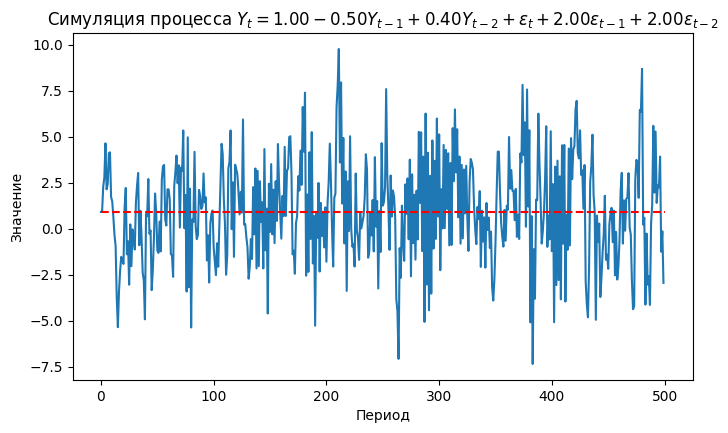

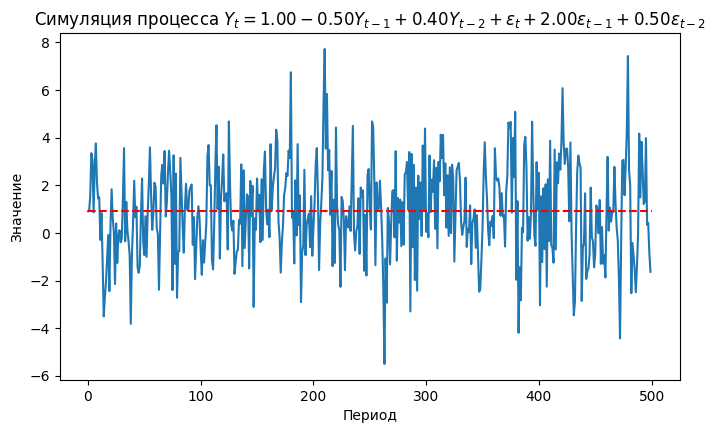

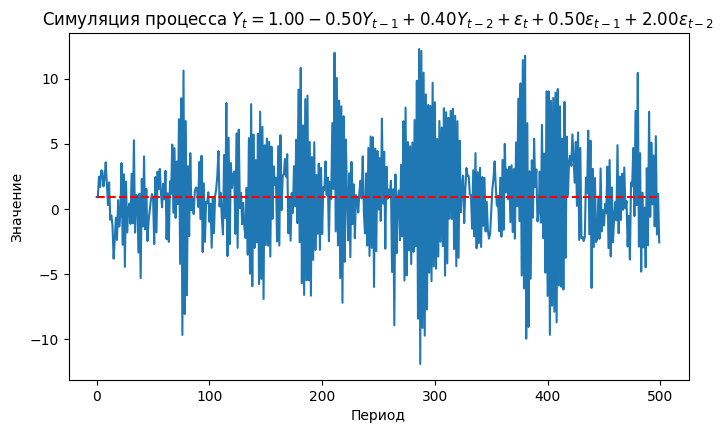

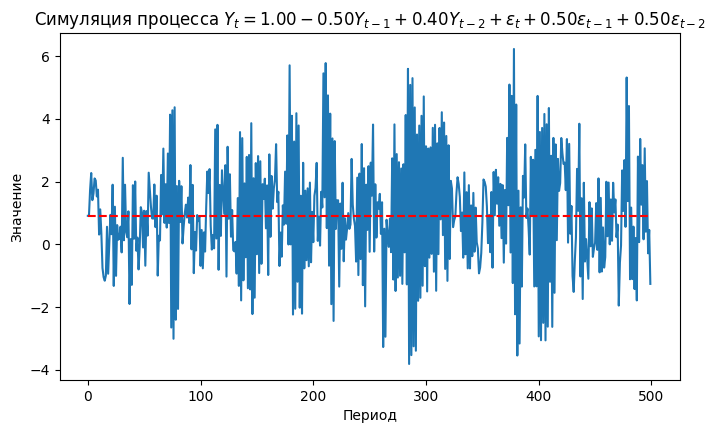

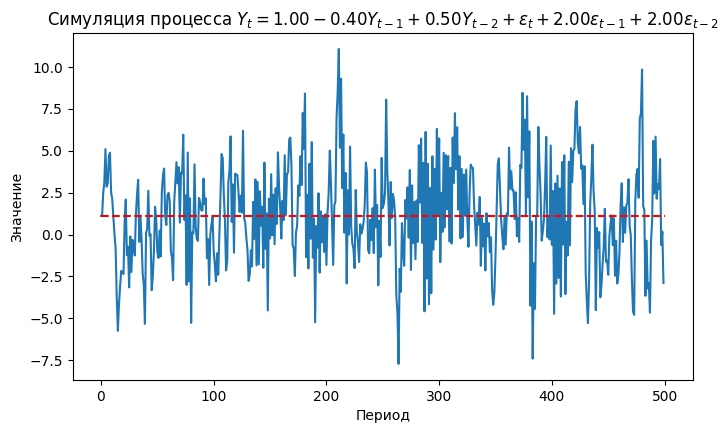

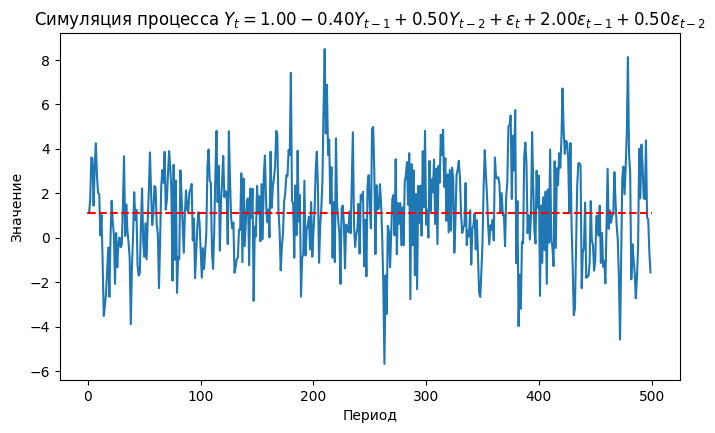

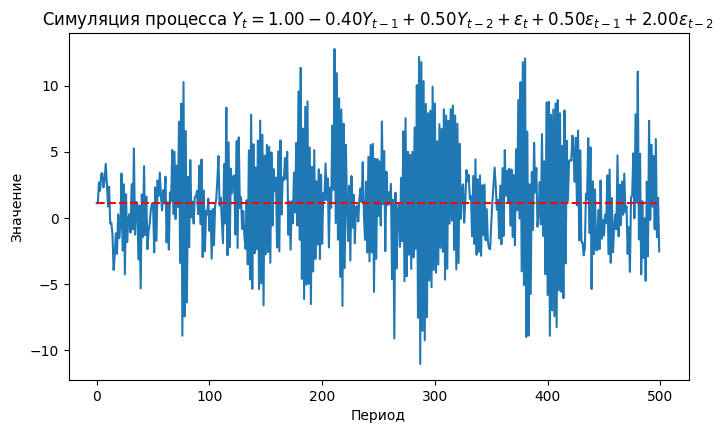

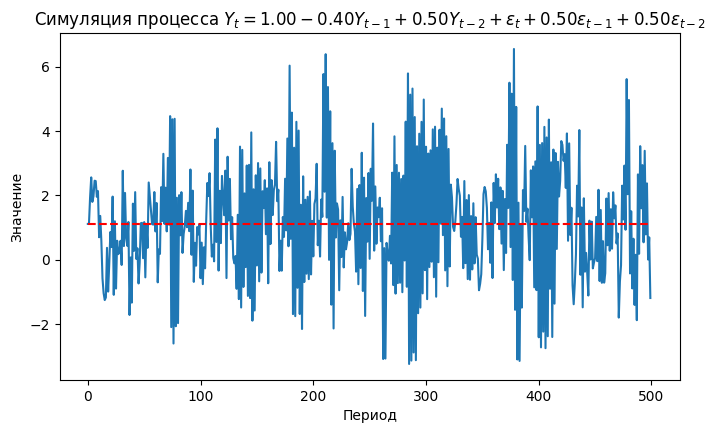

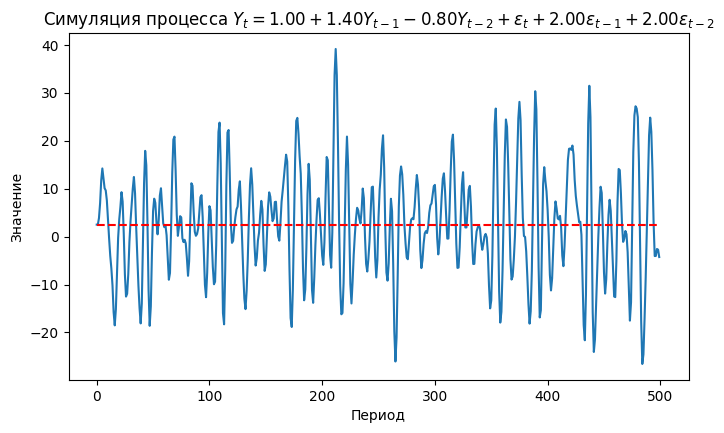

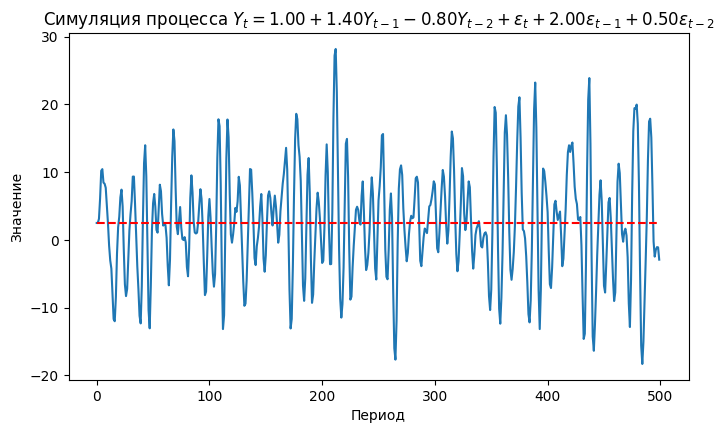

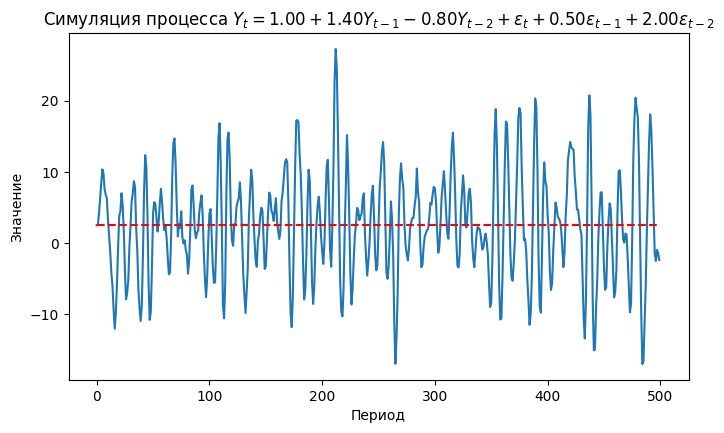

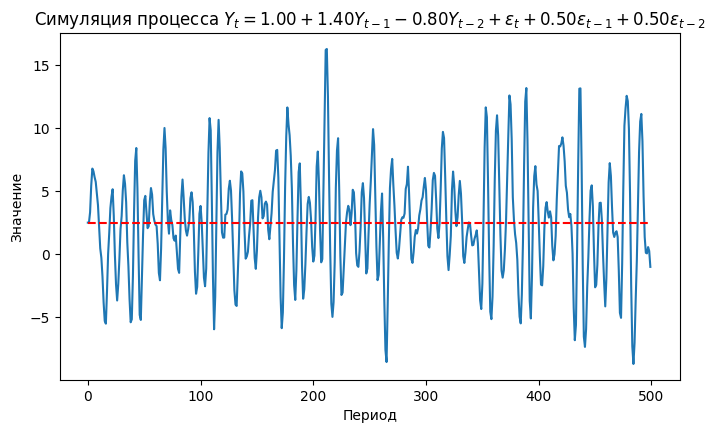

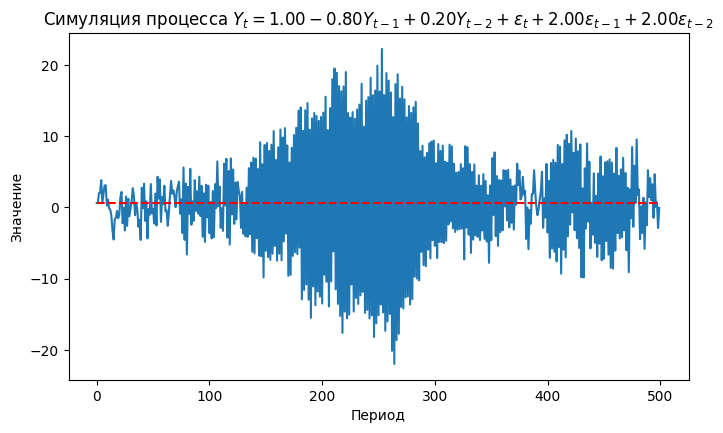

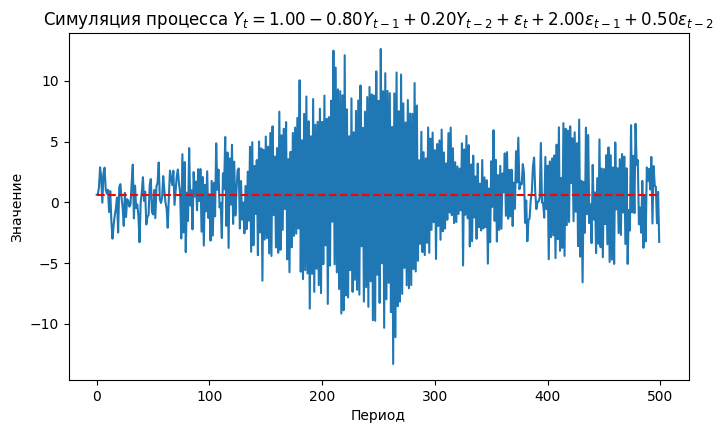

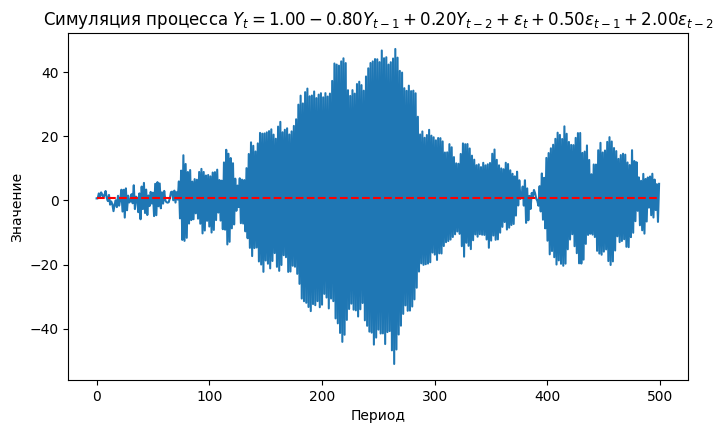

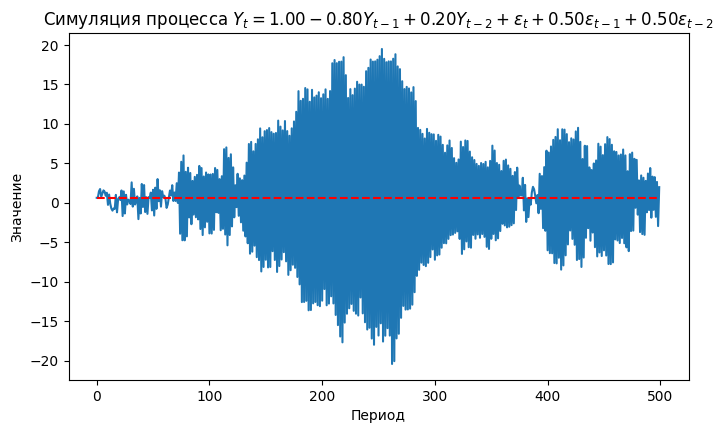

In [17]:
for phi_1, phi_2 in [(-0.5, 0.4), (-0.4, 0.5), (1.4, -0.8), (-0.8, 0.2),]:
    for theta_1, theta_2 in [(2, 2), (2, 0.5), (0.5, 2), (0.5, 0.5)]:
        simulate_arma22(phi_0 = 1, phi_1 = phi_1, phi_2 = phi_2, theta_1 = theta_1, theta_2 = theta_2, T = 500, random_state = 42)

In [18]:
def simulate_arma22_with_shocks(phi_0, phi_1, phi_2, theta_1, theta_2, T, random_state, plot = True):
    y = np.zeros(T)
    y[0] = phi_0 / (1-phi_1-phi_2)
    y[1] = phi_0 / (1-phi_1-phi_2)
    epsilons = stats.norm.rvs(size = T, random_state = random_state)
    epsilons[int(T/2)] = 10
    for t in range(2, T):
        y[t] = phi_0 + phi_1*y[t-1] + phi_2*y[t-2] + epsilons[t] + theta_1*epsilons[t-1] + theta_2*epsilons[t-2]
    if plot:
        fig = plt.figure(figsize = (8,4.5))
        plt.plot(y)
        plt.xlabel('Период')
        plt.ylabel('Значение')
        sign_phi1 = np.where(phi_1 > 0, '+', '-')
        sign_theta1 = np.where(theta_1 > 0, '+', '-')
        sign_phi2 = np.where(phi_2 > 0, '+', '-')
        sign_theta2 = np.where(theta_2 > 0, '+', '-')
        plt.title(r'Cимуляция процесса $Y_t = %.2f %s %.2f Y_{t-1} %s %.2f Y_{t-2} + \varepsilon_t %s %.2f \varepsilon_{t-1} %s %.2f \varepsilon_{t-2} $' %(np.abs(phi_0), sign_phi1, np.abs(phi_1), sign_phi2, np.abs(phi_2), sign_theta1, np.abs(theta_1), sign_theta2, np.abs(theta_2)))
        plt.hlines(y = y[0], xmin =0, xmax = T, color = 'r', linestyles = '--')
        #plt.text(x = T*0.95, y = y[0]*1.1, s = r'$\frac{%.2f}{1-%.2f}$' %(phi_0, phi_1), color = 'r')
        plt.show()
    else:
        return y

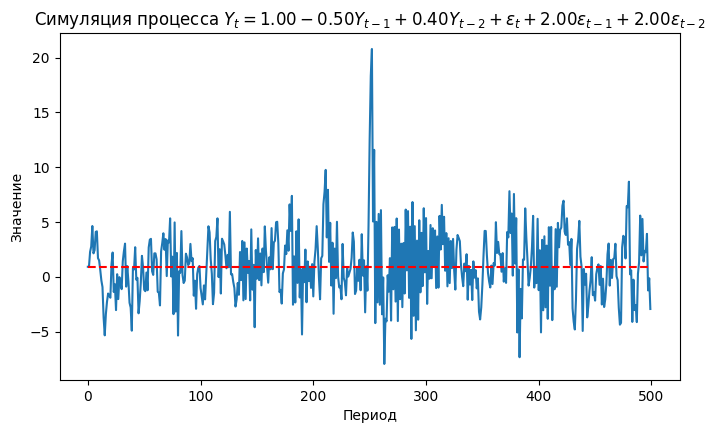

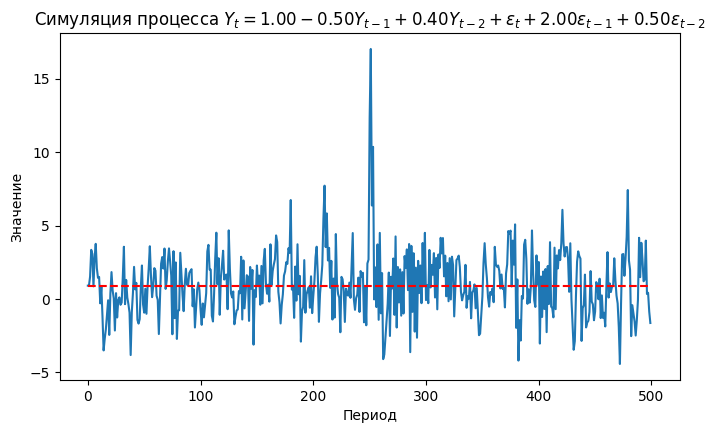

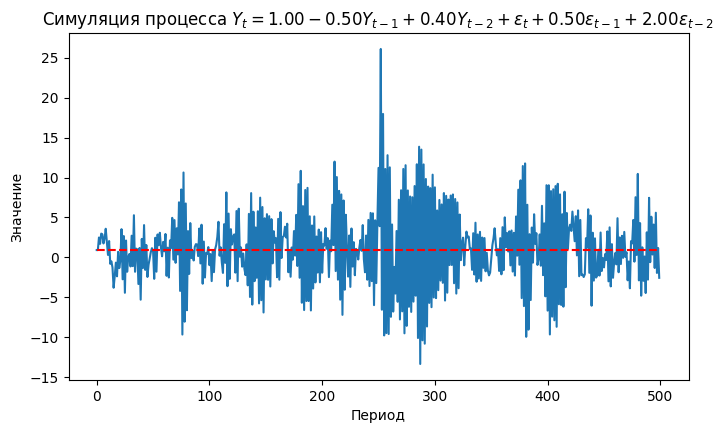

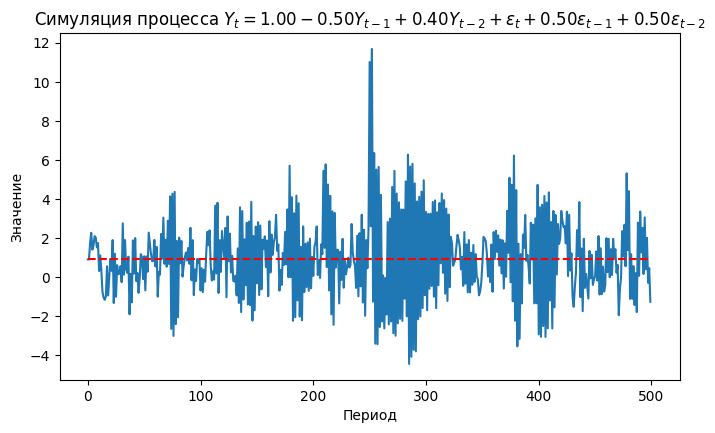

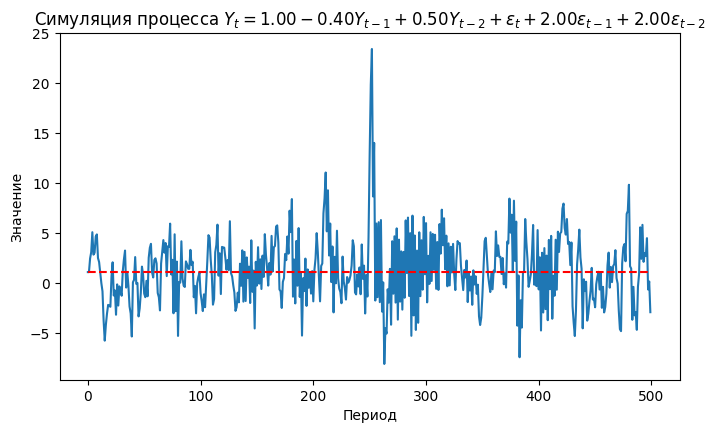

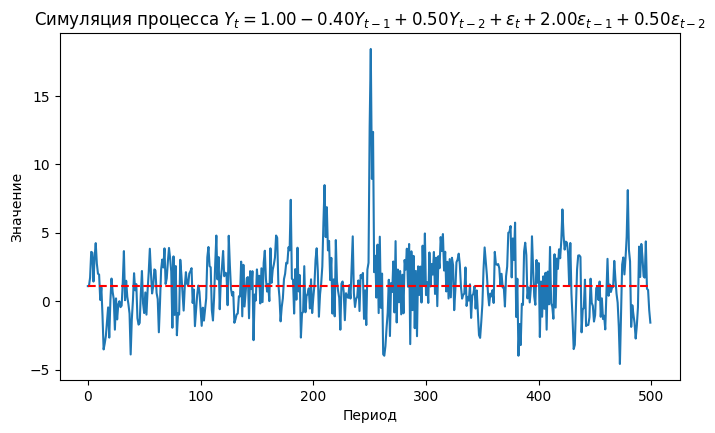

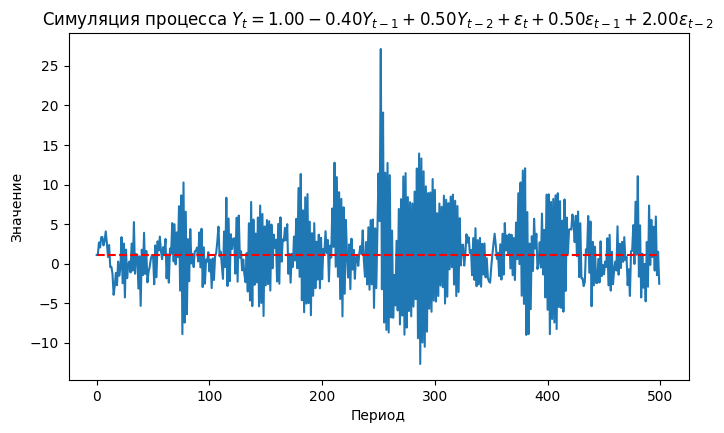

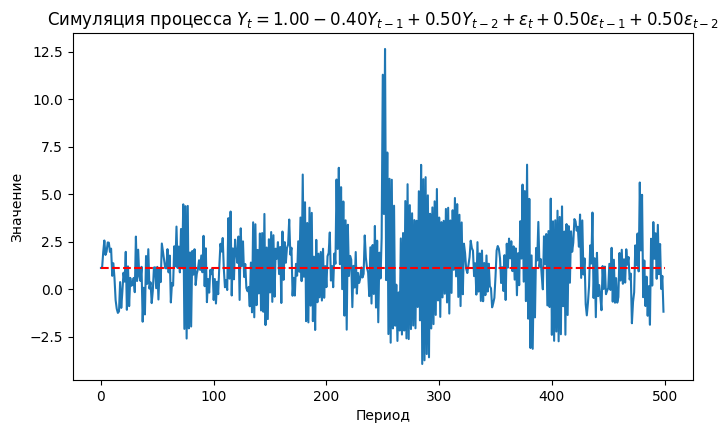

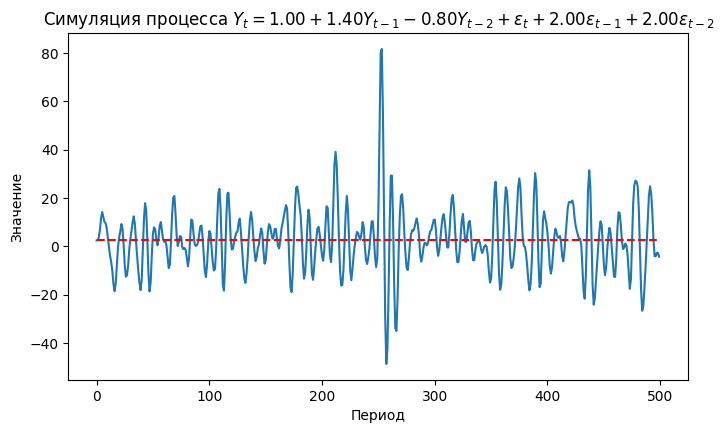

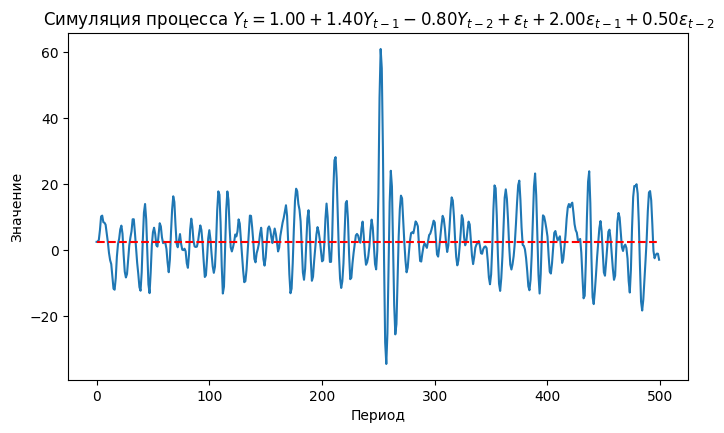

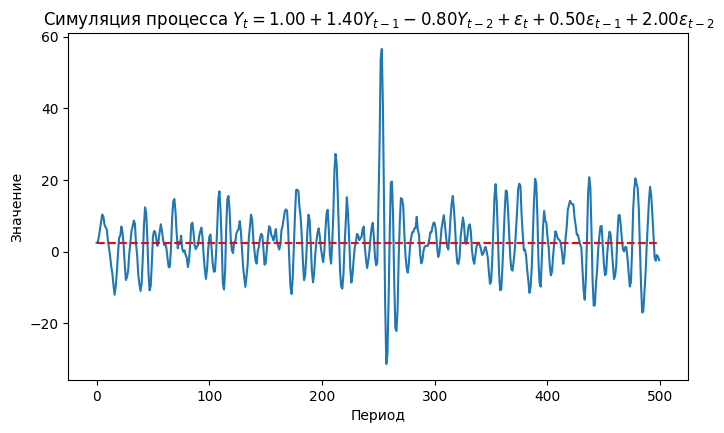

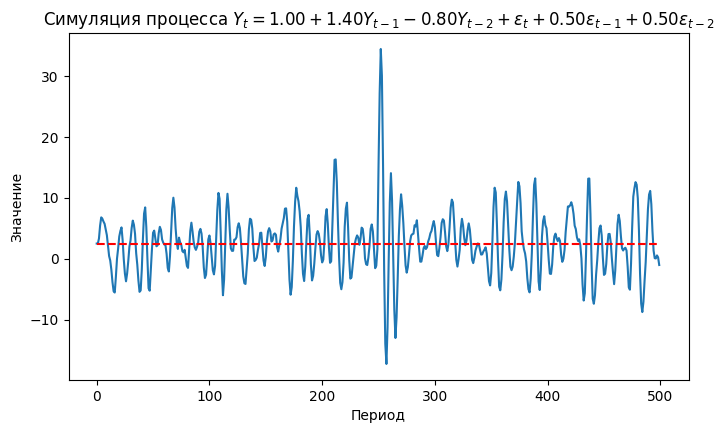

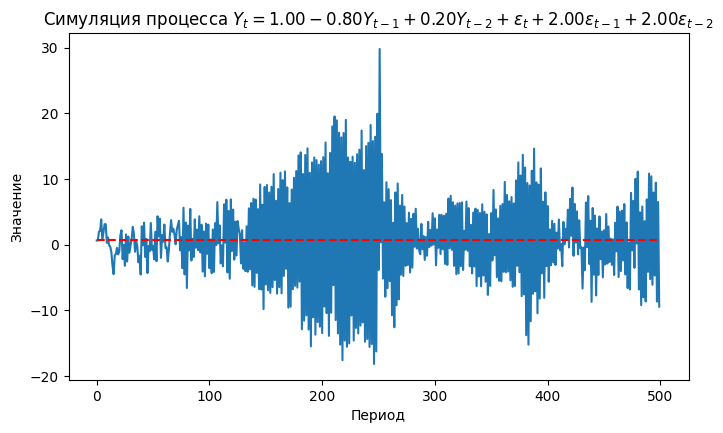

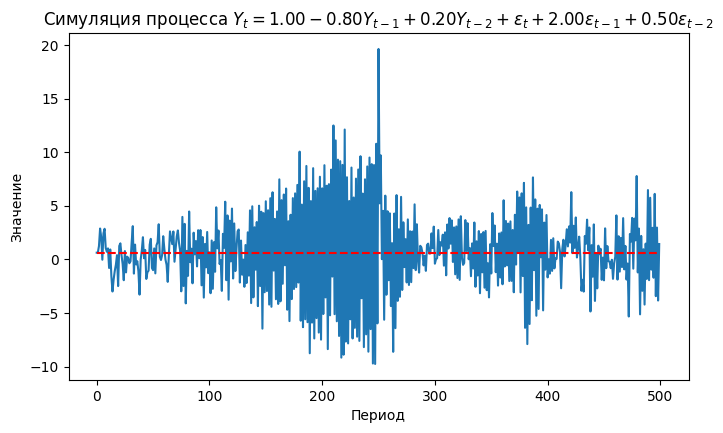

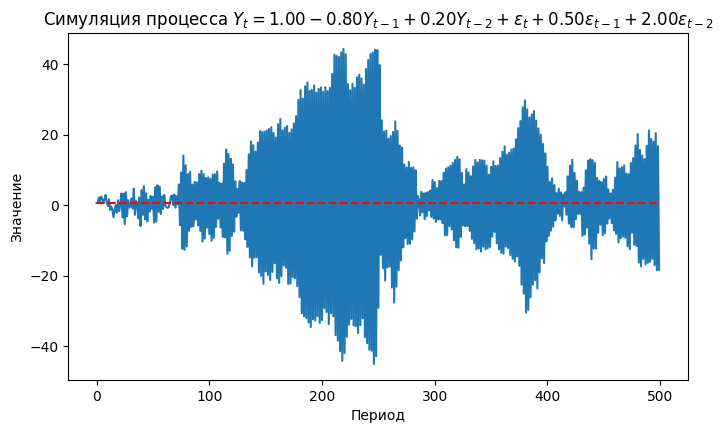

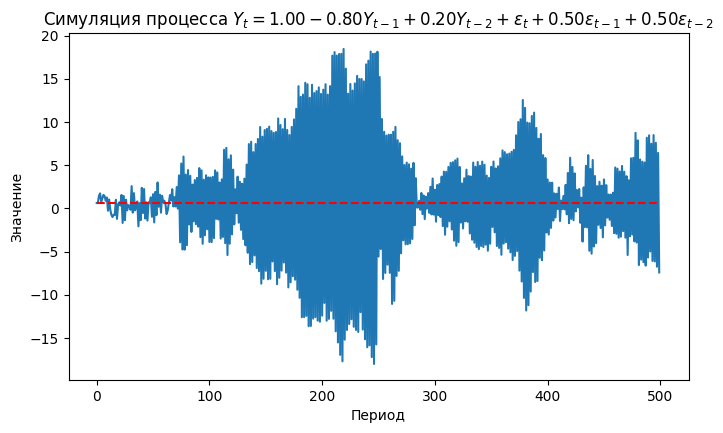

In [19]:
for phi_1, phi_2 in [(-0.5, 0.4), (-0.4, 0.5), (1.4, -0.8), (-0.8, 0.2),]:
    for theta_1, theta_2 in [(2, 2), (2, 0.5), (0.5, 2), (0.5, 0.5)]:
        simulate_arma22_with_shocks(phi_0 = 1, phi_1 = phi_1, phi_2 = phi_2, theta_1 = theta_1, theta_2 = theta_2, T = 500, random_state = 42)